***
# Cleaning cars data
***

In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy import stats
import matplotlib.pyplot as plt

In [4]:
cwd = os.getcwd()
print(cwd)

c:\Users\Charles_tour\Documents\GitHub\ml_car


In [5]:
# get the program file path
cwd = os.getcwd()

# Loop to create folders
folder_names = ['Dataframe', 'Output', 'Data']

folders = {}

for folder_name in folder_names:
    folders[folder_name] = os.path.join(cwd, folder_name)
    
    # print(folders)

    if not os.path.exists(os.path.join(cwd, folder_name)):
        os.makedirs(os.path.join(cwd, folder_name))
        print(f'Le dossier « {folder_name} » a été créé')

    else:
        print(f'Le dossier « {folder_name} » est existant')

Le dossier « Dataframe » est existant
Le dossier « Output » est existant
Le dossier « Data » est existant


In [6]:
# Création des variables de path
path_prog =     cwd + '\\'
path_data =     folders['Data'] + '\\'
path_df =       folders['Dataframe'] + '\\'
path_output =   folders['Output'] + '\\'

# Mettre \\ pour éviter les erreurs
path_dict = [path_prog, path_data, path_df, path_output]
for path in path_dict:
    path = path.replace('\\','\\\\')

# Détermination de l'année
print(path_prog)
print(path_data)
print(path_df)
print(path_output)

c:\Users\Charles_tour\Documents\GitHub\ml_car\
c:\Users\Charles_tour\Documents\GitHub\ml_car\Data\
c:\Users\Charles_tour\Documents\GitHub\ml_car\Dataframe\
c:\Users\Charles_tour\Documents\GitHub\ml_car\Output\


In [23]:
# Import et nettoyage
cars = pd.read_excel(path_data + 'BDSOQ.xlsx', header=5)
# Source des données : 
# https://bdso.gouv.qc.ca/pls/ken/ken213_afich_tabl.page_tabl?p_iden_tran=&p_lang=&p_m_o=SAAQ&p_id_ss_domn=718&p_id_raprt=3372#tri_age=1&tri_tertr=0

cars_ld = cars.loc[3:4].T.reset_index().loc[1:]
pd.set_option('display.max_columns', None)
column_names = ['year', 'vt', 'cl']
cars_ld.columns.values[0:len(column_names)] = column_names
cars_ld['total'] = cars_ld['vt'] + cars_ld['cl']

# Convert 'year' column to integers
cars_ld['year'] = cars_ld['year'].astype(int)
cars_ld

,year,vt,cl,total
1,2000,2629106,816997,3446103
2,2001,2678598,843160,3521758
3,2002,2729651,870812,3600463
4,2003,2799402,917540,3716942
5,2004,2847525,955337,3802862
6,2005,2871969,990193,3862162
7,2006,2899086,1035485,3934571
8,2007,2932451,1088787,4021238
9,2008,2972370,1132018,4104388
10,2009,3000245,1201962,4202207


C:\Users\Charles_tour\AppData\Local\Temp\ipykernel_15892\1789232794.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cars_ld['year'], rotation=45, ha='center')


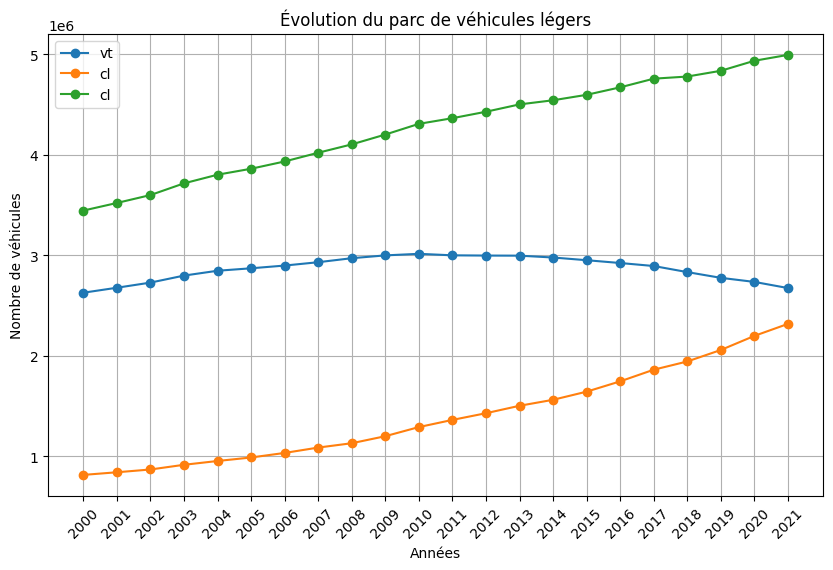

In [8]:
# Create the line plot
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')
ax.plot(cars_ld['year'], cars_ld['vt'], marker='o', label='vt')
ax.plot(cars_ld['year'], cars_ld['cl'], marker='o', label='cl')
ax.plot(cars_ld['year'], cars_ld['total'], marker='o', label='cl')

# Add labels and title
ax.set_xlabel('Années')
ax.set_ylabel('Nombre de véhicules')
ax.set_title('Évolution du parc de véhicules légers')
ax.legend()

ax.set_xticklabels(cars_ld['year'], rotation=45, ha='center')
# Display the plot
ax.grid(True)
plt.show()

***
## Forecast of the total number of light duty vehicules
***

In [20]:
# Splitting the data into X (year) and y (total)
X = cars_ld['year'].values.reshape(-1, 1)
y = cars_ld['total'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Create a range of years for prediction
years_to_predict = np.arange(2022, 2031).reshape(-1, 1)

# Calculate the predictions
predictions = model.predict(years_to_predict)

# Compute confidence intervals for predictions
confidence = 0.95
std_error = np.sqrt(np.sum((y - model.predict(X)) ** 2) / (len(y) - 2))
t_multiplier = stats.t.ppf((1 + confidence) / 2, len(X) - 2)
margin_of_error = t_multiplier * std_error
confidence_intervals = np.column_stack((predictions - margin_of_error, predictions + margin_of_error))

# Create a DataFrame with original values, predictions, and confidence intervals
data = {'year': np.concatenate((cars_ld['year'], years_to_predict.flatten())),
        'total': np.concatenate((y, [None] * len(years_to_predict))),
        'prediction': np.concatenate(([None] * len(cars_ld['year']), predictions)),
        'lower_CI': np.concatenate(([None] * len(cars_ld['year']), confidence_intervals[:, 0])),
        'upper_CI': np.concatenate(([None] * len(cars_ld['year']), confidence_intervals[:, 1]))}

predictions_df = pd.DataFrame(data)
# Replace None values with np.nan
predictions_df = predictions_df.replace([None], np.nan)

predictions_df

,year,total,prediction,lower_CI,upper_CI
0,2000,3446103.0,NaN,NaN,NaN
1,2001,3521758.0,NaN,NaN,NaN
2,2002,3600463.0,NaN,NaN,NaN
3,2003,3716942.0,NaN,NaN,NaN
4,2004,3802862.0,NaN,NaN,NaN
5,2005,3862162.0,NaN,NaN,NaN
6,2006,3934571.0,NaN,NaN,NaN
7,2007,4021238.0,NaN,NaN,NaN
8,2008,4104388.0,NaN,NaN,NaN
9,2009,4202207.0,NaN,NaN,NaN


In [17]:
# Evaluate the model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae = mean_absolute_error(y, model.predict(X))
mse = mean_squared_error(y, model.predict(X))
rmse = np.sqrt(mse)
r2 = r2_score(y, model.predict(X))

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Absolute Error: 30845.01
Mean Squared Error: 1461998973.34
Root Mean Squared Error: 38236.10
R-squared: 0.99


### Interpretation
- low MAE and RMSE indicate that the predictions are close to the actual value
- R2 of 0.99 is very near 1, it suggest that the model explain a substential amount of the variability
***

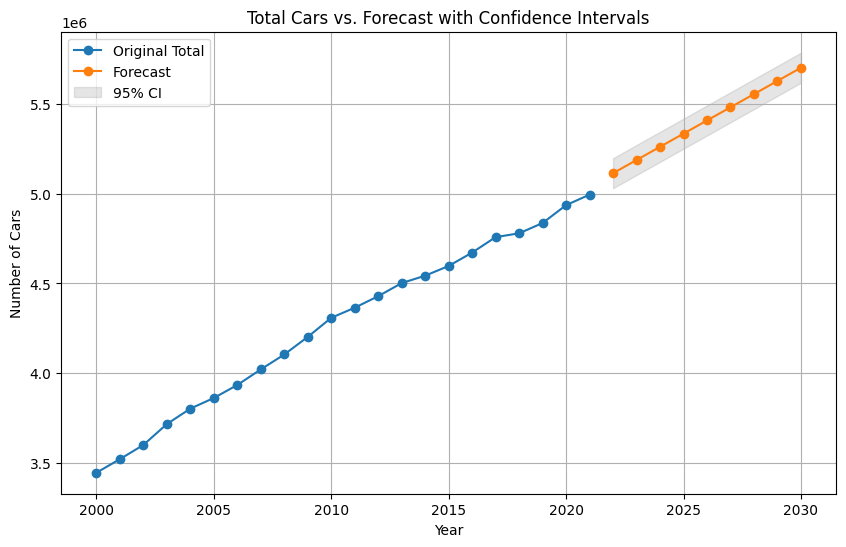

In [16]:
# Plotting
plt.figure(figsize=(10, 6), facecolor='white')
plt.plot(predictions_df['Year'], predictions_df['Original Total'], label='Original Total', marker='o')
plt.plot(predictions_df['Year'], predictions_df['Prediction'], label='Forecast', marker='o')

# Add Confidence Intervals
plt.fill_between(predictions_df['Year'], predictions_df['Lower CI'], predictions_df['Upper CI'], color='gray', alpha=0.2, label='95% CI')

plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.title('Total Cars vs. Forecast with Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()

***
## Forecast of cars
***

In [24]:
cars_ld.head(2)

,year,vt,cl,total
1,2000,2629106,816997,3446103
2,2001,2678598,843160,3521758


In [ ]:
# Splitting the data into X (year) and y (total)
X = cars_ld['year'].values.reshape(-1, 1)
y = cars_ld['vt'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Create a range of years for prediction
years_to_predict = np.arange(2022, 2031).reshape(-1, 1)

# Calculate the predictions
predictions = model.predict(years_to_predict)

In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Your existing code to create the predictions
X = cars_ld['year'].values.reshape(-1, 1)
y = cars_ld['vt'].values

degree = 3
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)
 
ridge_model.fit(X_poly, y)

# Create a range of years for prediction
years_to_predict = np.arange(2022, 2031).reshape(-1, 1)
X_to_predict = poly_features.transform(years_to_predict)

predictions = ridge_model.predict(X_to_predict)

# Create a DataFrame with original values, predictions, and confidence intervals (if applicable)
data = {'year': np.concatenate((cars_ld['year'], years_to_predict.flatten())),
        'vt': np.concatenate((y, [None] * len(years_to_predict))),
        'total': np.concatenate((cars_ld['total'], [None] * len(years_to_predict))),
        'prediction': np.concatenate(([None] * len(cars_ld['year']), predictions))
}

predictions_df = pd.DataFrame(data)

# Print the DataFrame with original values, predictions, and confidence intervals
predictions_df

C:\Users\Charles_tour\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.67333e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


,year,vt,total,prediction
0,2000,2629106,3446103,None
1,2001,2678598,3521758,None
2,2002,2729651,3600463,None
3,2003,2799402,3716942,None
4,2004,2847525,3802862,None
5,2005,2871969,3862162,None
6,2006,2899086,3934571,None
7,2007,2932451,4021238,None
8,2008,2972370,4104388,None
9,2009,3000245,4202207,None


In [56]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(cars_ld['total'], predictions_df['prediction'])
print("Mean Squared Error:", mse)

ValueError: Found input variables with inconsistent numbers of samples: [22, 31]

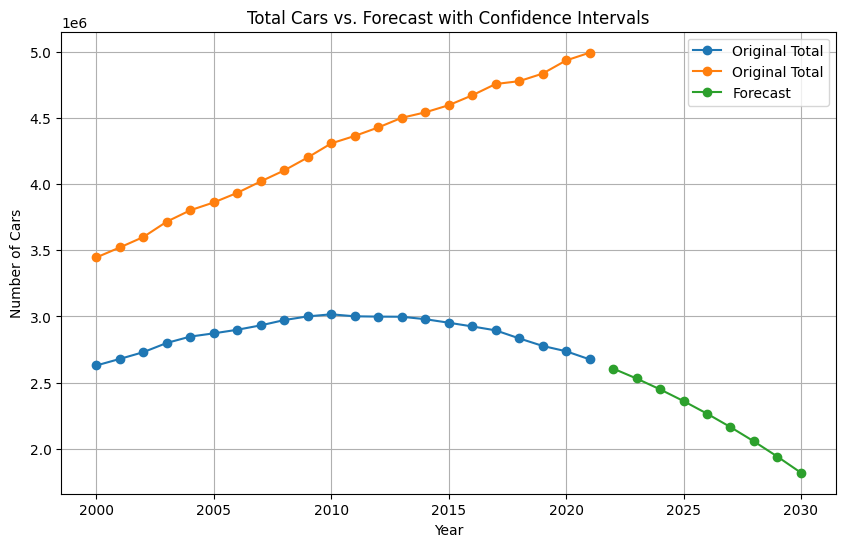

In [54]:
# Plotting
plt.figure(figsize=(10, 6), facecolor='white')
plt.plot(predictions_df['year'], predictions_df['vt'], label='Original Total', marker='o')
plt.plot(predictions_df['year'], predictions_df['total'], label='Original Total', marker='o')

plt.plot(predictions_df['year'], predictions_df['prediction'], label='Forecast', marker='o')

# Add Confidence Intervals
# plt.fill_between(predictions_df['Year'], predictions_df['Lower CI'], predictions_df['Upper CI'], color='gray', alpha=0.2, label='95% CI')

plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.title('Total Cars vs. Forecast with Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()